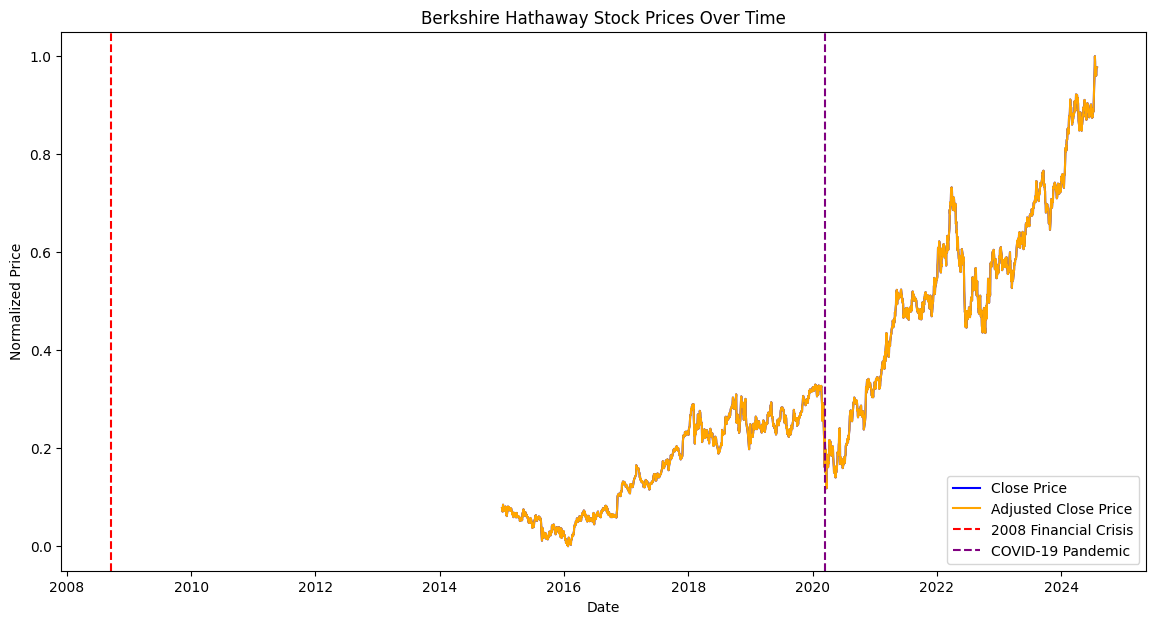

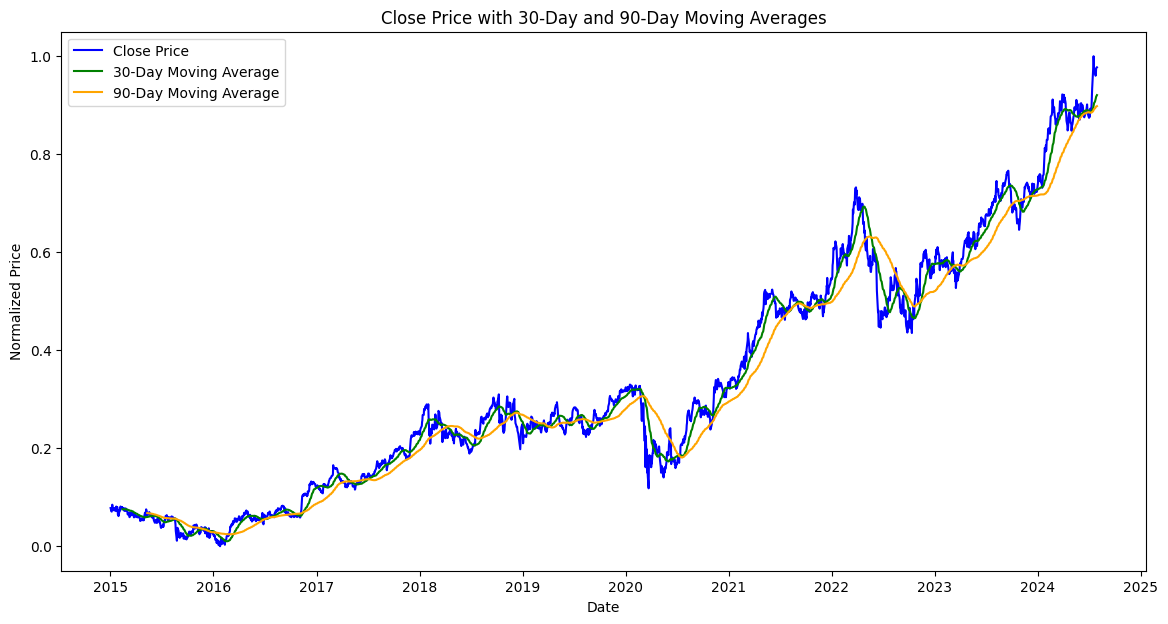

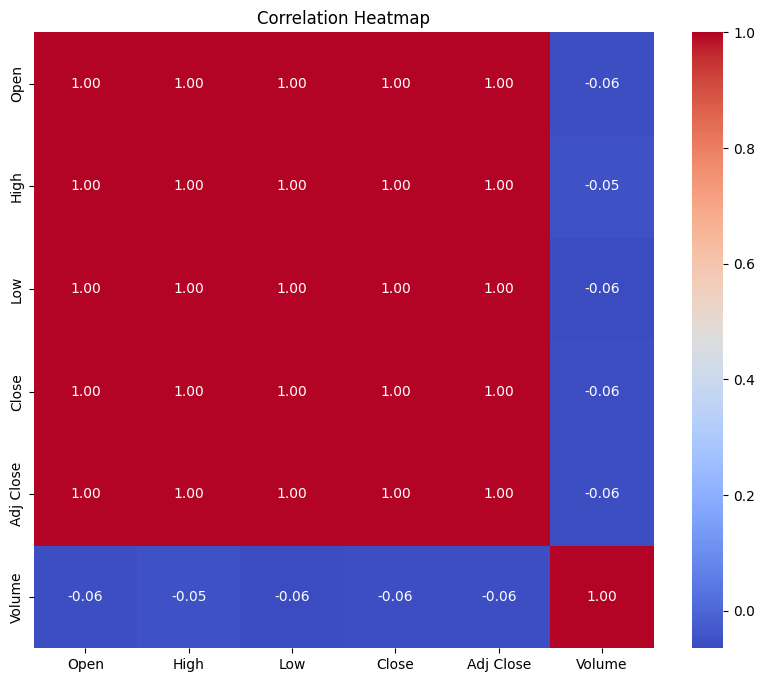

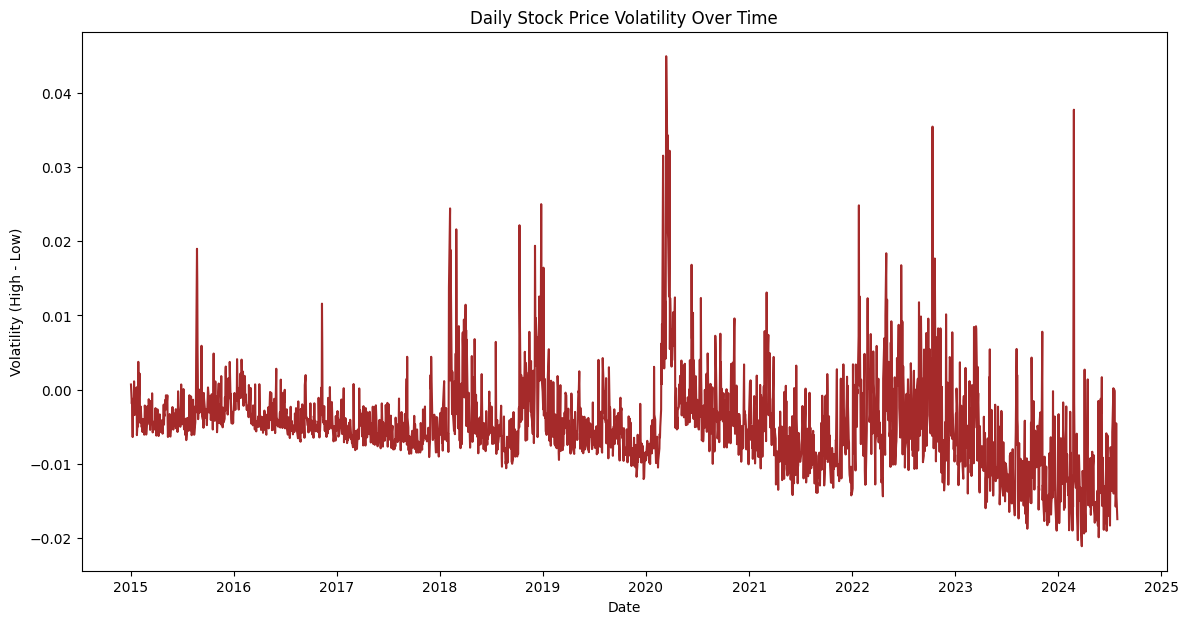

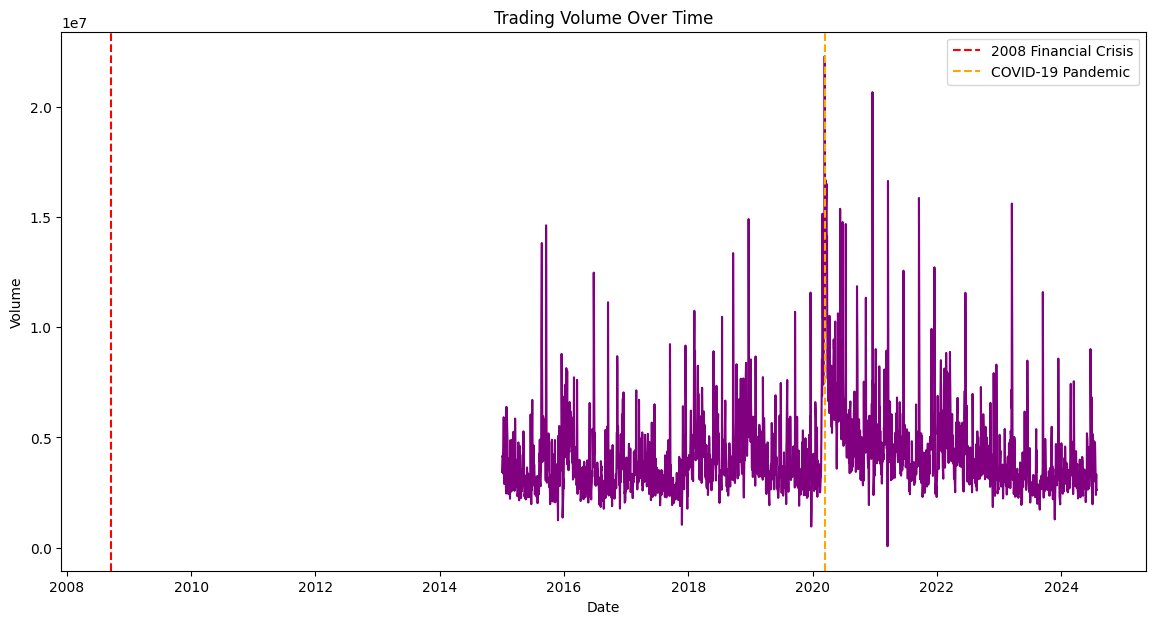

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = './normalized_berkshire_hathaway_data.csv'
df = pd.read_csv(file_path)

# Convert 'Date' to datetime format for time series plotting
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 1. Line Plot of Close and Adjusted Close Prices Over Time with Annotations
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['Adj Close'], label='Adjusted Close Price', color='orange')
plt.axvline(pd.Timestamp('2008-09-15'), color='red', linestyle='--', label='2008 Financial Crisis')
plt.axvline(pd.Timestamp('2020-03-11'), color='purple', linestyle='--', label='COVID-19 Pandemic')
plt.title("Berkshire Hathaway Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()

# 2. Moving Average Plot (30-day and 90-day) for Close Price
df['Close_30_day_MA'] = df['Close'].rolling(window=30).mean()
df['Close_90_day_MA'] = df['Close'].rolling(window=90).mean()

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['Close_30_day_MA'], label='30-Day Moving Average', color='green')
plt.plot(df.index, df['Close_90_day_MA'], label='90-Day Moving Average', color='orange')
plt.title("Close Price with 30-Day and 90-Day Moving Averages")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()

# 3. Correlation Heatmap for Stock Prices and Volume
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 4. Daily Volatility (High - Low) Over Time
df['Volatility'] = df['High'] - df['Low']

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Volatility'], color='brown')
plt.title("Daily Stock Price Volatility Over Time")
plt.xlabel("Date")
plt.ylabel("Volatility (High - Low)")
plt.show()

# 5. Volume Over Time with Annotations
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Volume'], color='purple')
plt.axvline(pd.Timestamp('2008-09-15'), color='red', linestyle='--', label='2008 Financial Crisis')
plt.axvline(pd.Timestamp('2020-03-11'), color='orange', linestyle='--', label='COVID-19 Pandemic')
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()
